In [112]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("../")

import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets using typhon FileSet objects.

In [113]:
outdir = '../flight_phase_files/'
datadir = '/Users/heike/Documents/eurec4a/data_processing/EUREC4A_campaignData/all_nc/'
bahamas = xr.open_dataset(datadir + 'bahamas_20200122_v0.4.nc')
dropsondes = xr.open_dataset(datadir + 'dropsondes_20200122_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [114]:
takeoff = 0
touchdown = len(bahamas['time']) - 1


###############
#1st circle set
###############
# circle 1
enter_c1_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 0)
enter_c1 = fpt.timestamp_ind_1min_prior(bahamas, enter_c1_ds)
exit_c1 = fpt.exit_circle_timestamp_ind(bahamas, enter_c1)

# circle 2
enter_c2_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
enter_c2 = fpt.timestamp_ind_1min_prior(bahamas, enter_c2_ds)
exit_c2 = fpt.exit_circle_timestamp_ind(bahamas, enter_c2)

# circle 3
enter_c3_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
enter_c3 = fpt.timestamp_ind_1min_prior(bahamas, enter_c3_ds)
exit_c3 = fpt.exit_circle_timestamp_ind(bahamas, enter_c3)


#####################
#baccardi_calibration
#####################
# Box pattern
bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))
max_dzdt_before_baccardi_cal = fpt.max_timestamp_ind(bahamas, 'altitude_dt', 
                               slice('2020-01-22T18:50:00', '2020-01-22T19:00:00'), order=1000)
enter_baccardi_cal = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_dzdt_before_baccardi_cal, 0., 0.05)

min_roll_before_baccardi_cal = fpt.min_timestamp_ind(bahamas, 'roll', 
                               slice('2020-01-22T19:00:00', '2020-01-22T19:10:00'), order=1000)
exit_baccardi_cal = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_baccardi_cal, 0., 0.3)

#leg1
enter_leg1 = exit_baccardi_cal
max_roll_after_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-22T19:00:00', '2020-01-22T19:30:00'), order=1000)
exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg1, 0., 0.05)

#leg2
min_roll_before_leg2 = fpt.min_timestamp_ind(bahamas, 'roll', 
                       slice('2020-01-22T19:15:00', '2020-01-22T19:45:00'), order=1000)
enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_leg2, 0., 0.05)
max_roll_after_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-22T19:30:00', '2020-01-22T19:45:00'), order=1000)
exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg2, 0., 0.05)


###############
#2nd circle set
###############
# circle 4
enter_c4_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
enter_c4 = fpt.timestamp_ind_1min_prior(bahamas, enter_c4_ds)
exit_c4 = fpt.exit_circle_timestamp_ind(bahamas, enter_c4)

# circle 5
enter_c5_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 47)
enter_c5 = fpt.timestamp_ind_1min_prior(bahamas, enter_c5_ds)
exit_c5 = fpt.exit_circle_timestamp_ind(bahamas, enter_c5)

# circle 6
# set beginning of circle 6 directly after end of circle 5
enter_c6 = fpt.timestamp_ind_1min_prior(bahamas, exit_c5+1)
max_roll_after_c6 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-22T22:45:00', '2020-01-22T23:10:00'), order=1000)
exit_c6 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_c6, 0., 3)
headingdiff = bahamas['heading'][exit_c6]-bahamas['heading'][enter_c6]+360
irr_c6 = 'Circle is only {:.2f} deg'.format(headingdiff.values)


############
# Circling 1
############
enter_circling1 = enter_c1
exit_circling1 = exit_c3


############
# Circling 2
############
max_roll_before_circle4 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-22T19:30:00', '2020-01-22T19:55:00'), order=1000)
enter_circling2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_circle4, 3., 0.5)
exit_circling2 = exit_c6




############
# Lidar legs
############

# Leg 3
enter_leg3 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', exit_c6, 0., 0.05)
min_roll_after_leg3 = fpt.min_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-22T23:00:00', '2020-01-22T23:30:00'), order=1000)
exit_leg3 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_leg3, 0., 0.05)

# Lidar leg
min_roll_before_lidar_cal = fpt.min_timestamp_ind(bahamas, 'roll', 
                            slice('2020-01-22T23:20:00', '2020-01-22T23:30:00'), order=1000)
enter_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_lidar_cal, 0., 0.05)
min_roll_after_lidar_cal = fpt.min_timestamp_ind(bahamas, 'roll', 
                           slice('2020-01-22T18:40:00', '2020-01-22T18:45:00'), order=1000)
exit_lidar_cal = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_lidar_cal, 0., 0.05)


In [115]:

ts_ind_list = [takeoff, enter_c1, exit_c1, 
               enter_c2, exit_c2, enter_c3, exit_c3, 
               enter_baccardi_cal, exit_baccardi_cal, 
               exit_leg1, enter_leg2, exit_leg2, 
               enter_c4, exit_c4, enter_c5, exit_c5, 
               enter_c6, exit_c6, enter_leg3, exit_leg3, 
               enter_lidar_cal, exit_lidar_cal, touchdown]
label_list = ["takeoff", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", "enter_c3", "exit_c3", 
              "enter_baccardi_cal", "exit_baccardi_cal/enter_leg1", 
              "exit_leg1", "enter_leg2", "exit_leg2",
              "enter_c4", "exit_c4", "enter_c5", "exit_c5", 
              "enter_c6", "exit_c6", "enter_leg3", "exit_leg3",
              "enter_lidar_cal", "exit_lidar_cal", "touchdown"]

In [116]:
#create markers for every dropsonde
#--> helps to see the individual circles
#only execute if needed!
# ts_ind_list = []
# label_list = np.arange(1,len(dropsondes["launch_time"])+1)
# for i in range(len(dropsondes["launch_time"])):
#     ts_ind_list.append(fpt.ds_timestamp_ind(bahamas, dropsondes,  i))

# Check numer of good dropsondes per circle

In [117]:
c1NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c1].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c1].values):
        c1NumSondes = c1NumSondes+1
        

c2NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c2].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c2].values):
        c2NumSondes = c2NumSondes+1
        

c3NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c3].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c3].values):
        c3NumSondes = c3NumSondes+1
        

c4NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c4].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c4].values):
        c4NumSondes = c4NumSondes+1
        

c5NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c5].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c5].values):
        c5NumSondes = c5NumSondes+1

# remove one sonde (2020-01-22 21:56) because of failed launch detect
c5NumSondes=c5NumSondes-1


c6NumSondes = 0
for i in range(len(dropsondes["launch_time"])):
    if fpt.dt64_to_dt(bahamas["time"][enter_c6].values) \
    < fpt.dt64_to_dt(dropsondes["launch_time"][i].values) \
    < fpt.dt64_to_dt(bahamas["time"][exit_c6].values):
        c6NumSondes = c6NumSondes+1
        


# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

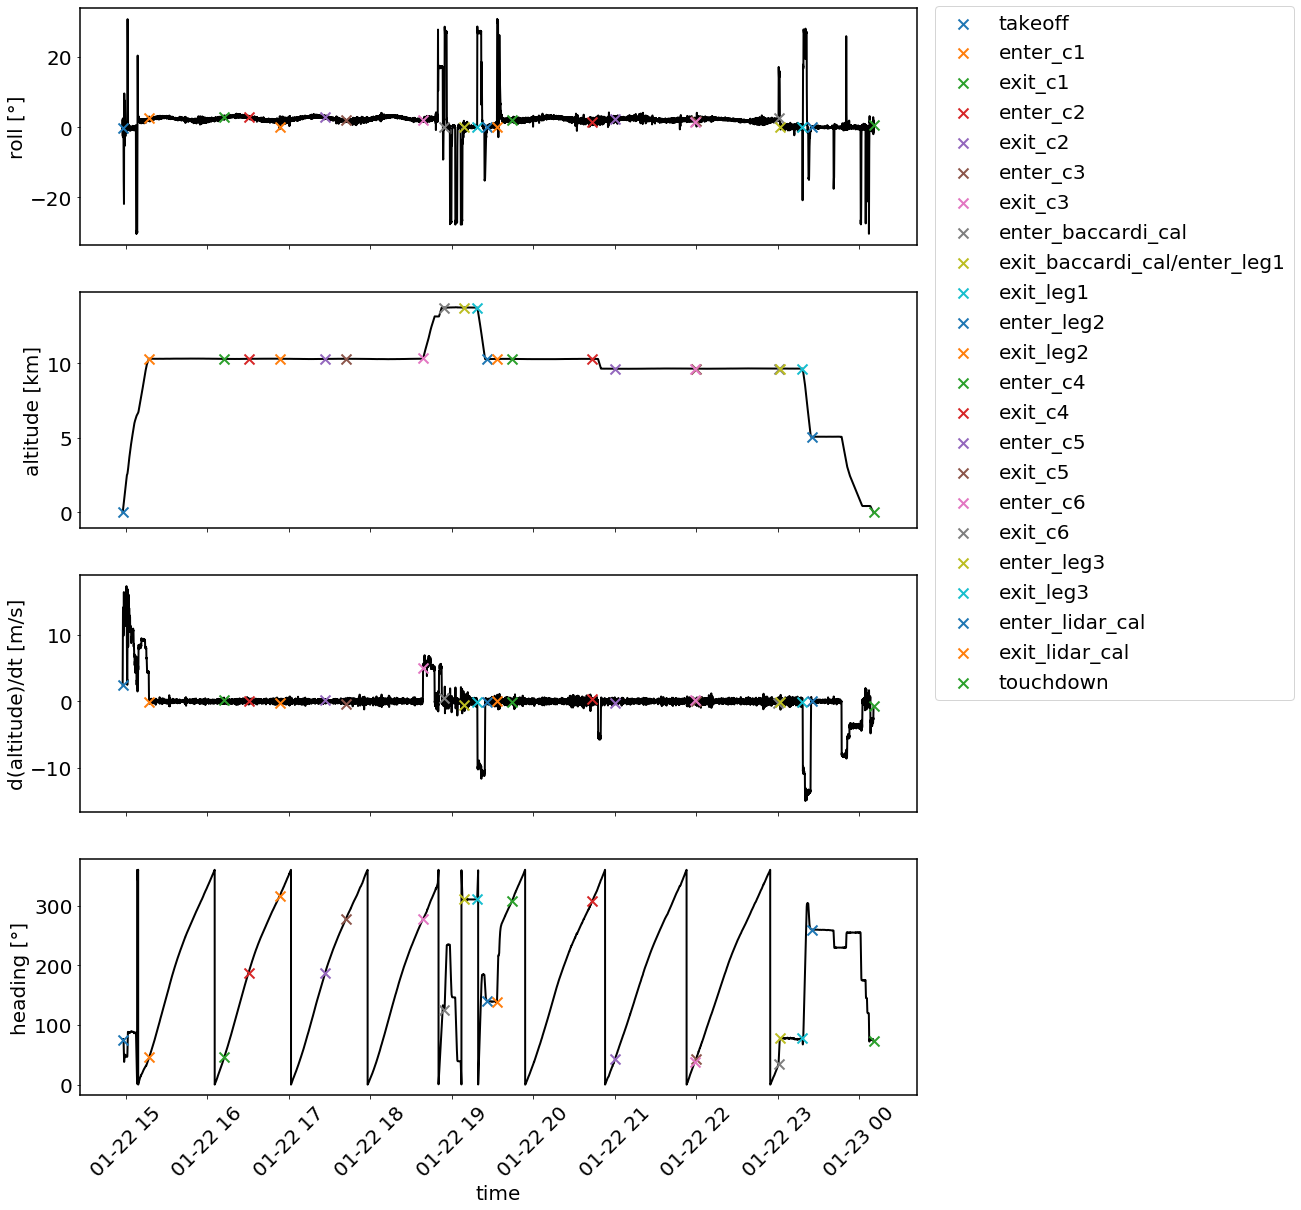

In [118]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Create a ResearchFlight object to represent the flight meta data.

In [119]:
RF02 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0122',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['dataset creator'],
                          },
                          {
                              'name': 'Bjorn Stevens',
                              'email': 'bjorn.stevens@mpimet.mpg.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200122/HALO-0122.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Basic pattern of circles, spur towards NTAS removed in favour of calibration maneuvers.',
                               'Square pattern for BACCARDI calibration at FL410 (above Cirrus), with return leg at FL310 (below Cirrus).',
                               'Very moist and deep trade-wind layer, convection extending to 4 km associated with a Fish pattern in the SW-edge of the circle.',
                               'Descending Cirrus (9-13.5km) coming from West and South of the circle.',
                               'Away from the southwest edge of the track the air was almost entirely cloud free.'],
)

# Store the flight phase information in ResearchFlightSegment objects.

In [120]:
circle1 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 1',
                                good_dropsondes=c1NumSondes,
                                irregularities='',
                                segment_id=RF02.flight_id + '_c1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values)
                               )
circleBreak1to2 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='Break between circle 1 and 2',
                                        irregularities='',
                                        segment_id=RF02.flight_id + '_cb1',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values)
                                       )
circle2 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 2',
                                good_dropsondes=c2NumSondes,
                                irregularities='',
                                segment_id=RF02.flight_id + '_c2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values)
                               )
circleBreak2to3 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='Break between circle 2 and 3',
                                        irregularities='',
                                        segment_id=RF02.flight_id + '_cb2',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values)
                                       ) 
circle3 = ResearchFlightSegment(kinds=['circle'],
                                good_dropsondes=c3NumSondes,
                                irregularities='',
                                segment_id=RF02.flight_id + '_c3',
                                name='Circle 3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values)
                               )
baccardi_cal = ResearchFlightSegment(kinds=['baccardi_calibration'],
                                     name='Baccardi calibration',
                                     irregularities='',
                                     segment_id=RF02.flight_id + '_bc1',
                                     start=fpt.dt64_to_dt(bahamas["time"][enter_baccardi_cal].values),
                                     end=fpt.dt64_to_dt(bahamas['time'][exit_baccardi_cal].values)
                                    )
leg1 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 1 above cirrus',
                             irregularities='',
                             segment_id=RF02.flight_id + '_sl1',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values)
                            )
leg2 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 2 below cirrus',
                             irregularities='',
                             segment_id=RF02.flight_id + '_sl2',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values)
                            )
circle4 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 4',
                                good_dropsondes=c4NumSondes,
                                irregularities='',
                                segment_id=RF02.flight_id + '_c4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values)
                               )
circleBreak4to5 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='Break between circle 4 and 5',
                                        irregularities='',
                                        segment_id=RF02.flight_id + '_cb3',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values)
                                       )
circle5 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 5',
                                good_dropsondes=c5NumSondes,
                                irregularities='',
                                segment_id=RF02.flight_id + '_c5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values)
                               )
# no break between circles 5 and 6                                  
circle6 = ResearchFlightSegment(kinds=['circle'],
                                name='Circle 6',
                                good_dropsondes=c6NumSondes,
                                irregularities=irr_c6,
                                segment_id=RF02.flight_id + '_c6',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c6].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c6].values)
                               )
leg3 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 3 over R/V Meteor',
                             irregularities='',
                             segment_id=RF02.flight_id + '_sl3',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg3].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg3].values)
                            )
lidar_cal = ResearchFlightSegment(kinds=['lidar_leg'],
                                  name='Lidar leg',
                                  irregularities='',
                                  segment_id=RF02.flight_id + '_ll1',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values)
                                 )
circling1 = ResearchFlightSegment(kinds=['circling'],
                                  name='Circling 1',
                                  irregularities='',
                                  segment_id=RF02.flight_id + '_o1',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_circling1].values),
                                  end=fpt.dt64_to_dt(bahamas["time"][exit_circling1].values)
                                 )
circling2 = ResearchFlightSegment(kinds=['circling'],
                                  name='Circling 2',
                                  irregularities='',
                                  segment_id=RF02.flight_id + '_o2',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_circling2].values),
                                  end=fpt.dt64_to_dt(bahamas["time"][exit_circling2].values)
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [121]:
RF02.to_dictionary()

{'name': 'RF02',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0122',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['dataset creator']},
  {'name': 'Bjorn Stevens',
   'email': 'bjorn.stevens@mpimet.mpg.de',
   'tags': ['flight PI']}],
 'date': datetime.date(2020, 1, 22),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200122/HALO-0122.pdf',
 'takeoff': datetime.datetime(2020, 1, 22, 14, 57, 35),
 'landing': datetime.datetime(2020, 1, 23, 0, 10, 30),
 'events': [],
 'remarks': ['Basic pattern of circles, spur towards NTAS removed in favour of calibration maneuvers.',
  'Square pattern for BACCARDI calibration at FL410 (above Cirrus), with return leg at FL310 (below Cirrus).',
  'Very moist and deep trade-wind layer, convection extending to 4 km associated with a Fish pattern in the SW-edge of the circle.',
  'Descending Cirrus (9-13.5km) coming from West and South of the circle.',
  'Away from the southwe

In [122]:
RF02.append_segments([circle1, circleBreak1to2, 
                      circle2, circleBreak2to3,
                      circle3, baccardi_cal,
                      leg1, leg2,
                      circle4, circleBreak4to5, circle5,
                      circle6, leg3, lidar_cal,
                      circling1, circling2])

print(RF02)

In [123]:
RF02.to_yaml(filename=outdir + 'HALO_RF02_20200122_info.yaml')